In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad  # Make sure to import anndata
import matplotlib.pyplot as pl
import seaborn as sns
import bbknn
import scvelo as scv
import anndata
import leidenalg
import loompy
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
from matplotlib.pyplot import rc_context
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import random
import mellon

In [2]:
import os
import scanpy as sc

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")
adata = sc.read_h5ad('combined data.h5ad')
adata

AnnData object with n_obs × n_vars = 45833 × 55389
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'

In [3]:
adata.obs.groupby('Sample').count()

batch  doublet  n_genes  n_genes_by_counts  total_counts  \
Sample                                                                  
YSham_GFP     1741     1741     1741               1741          1741   
YSham_noGFP   6930     6930     6930               6930          6930   
YOV_GFP       3660     3660     3660               3660          3660   
YOV_noGFP     6783     6783     6783               6783          6783   
ASham_GFP     1281     1281     1281               1281          1281   
ASham_noGFP   9075     9075     9075               9075          9075   
AOV_GFP       6232     6232     6232               6232          6232   
AOV_noGFP    10131    10131    10131              10131         10131   

             total_counts_mt  pct_counts_mt  
Sample                                       
YSham_GFP               1741           1741  
YSham_noGFP             6930           6930  
YOV_GFP                 3660           3660  
YOV_noGFP               6783           6783  
ASham_GFP               1281           1281  
ASham_noGFP             9075           9075  
AOV_GFP                 6232           6232  
AOV_noGFP              10131          10131

In [4]:
sc.pp.filter_genes(adata, min_cells = 3)
adata

AnnData object with n_obs × n_vars = 45833 × 37912
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells'

In [5]:
adata.layers['counts'] = adata.X.copy()

In [6]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=3000)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts','pct_counts_mt'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 45833 × 4754
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [8]:
kwargs=dict(verbose=True,plot_convergence=True,max_iter_kmeans=25)
sc.external.pp.harmony_integrate(adata,key='batch',**kwargs)
sc.pp.neighbors(adata,use_rep='X_pca_harmony',n_neighbors=30, n_pcs=50)


2025-03-28 14:50:13,413 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-28 14:50:21,361 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-28 14:50:21,590 - harmonypy - INFO - Iteration 1 of 10
2025-03-28 14:50:44,206 - harmonypy - INFO - Iteration 2 of 10
2025-03-28 14:51:06,579 - harmonypy - INFO - Iteration 3 of 10
2025-03-28 14:51:29,348 - harmonypy - INFO - Converged after 3 iterations


In [9]:
sc.tl.leiden(adata,resolution=1)

In [10]:
sc.tl.umap(adata)

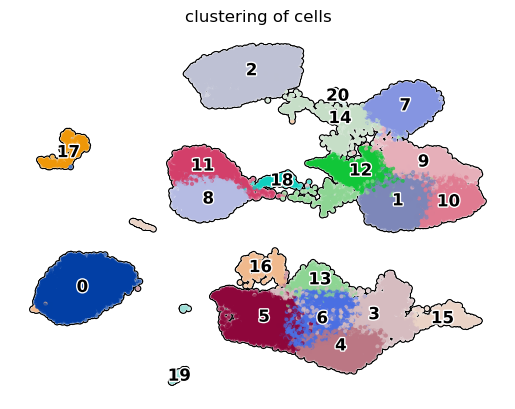

In [11]:
sc.pl.umap(adata, color='leiden', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2,frameon=False, size=35,
           title='clustering of cells')

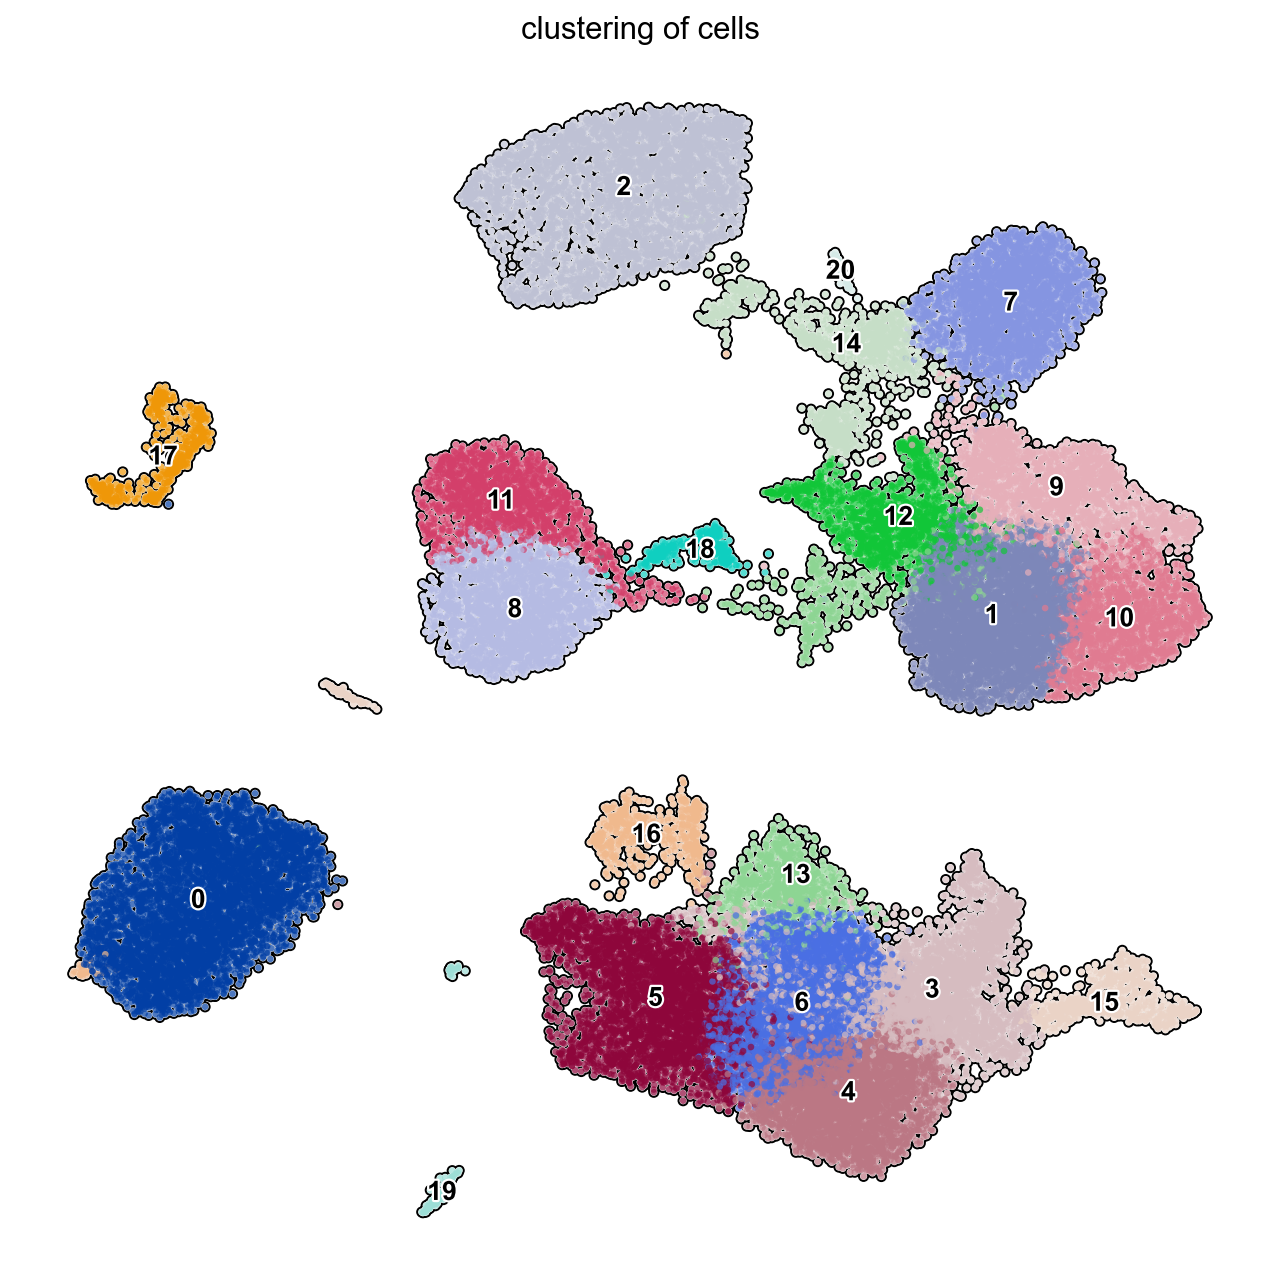

In [18]:
sc.pl.umap(adata, color='leiden', add_outline=True, legend_loc='on data',
           legend_fontsize=12, legend_fontoutline=2,frameon=False, size=35,
           title='clustering of cells')

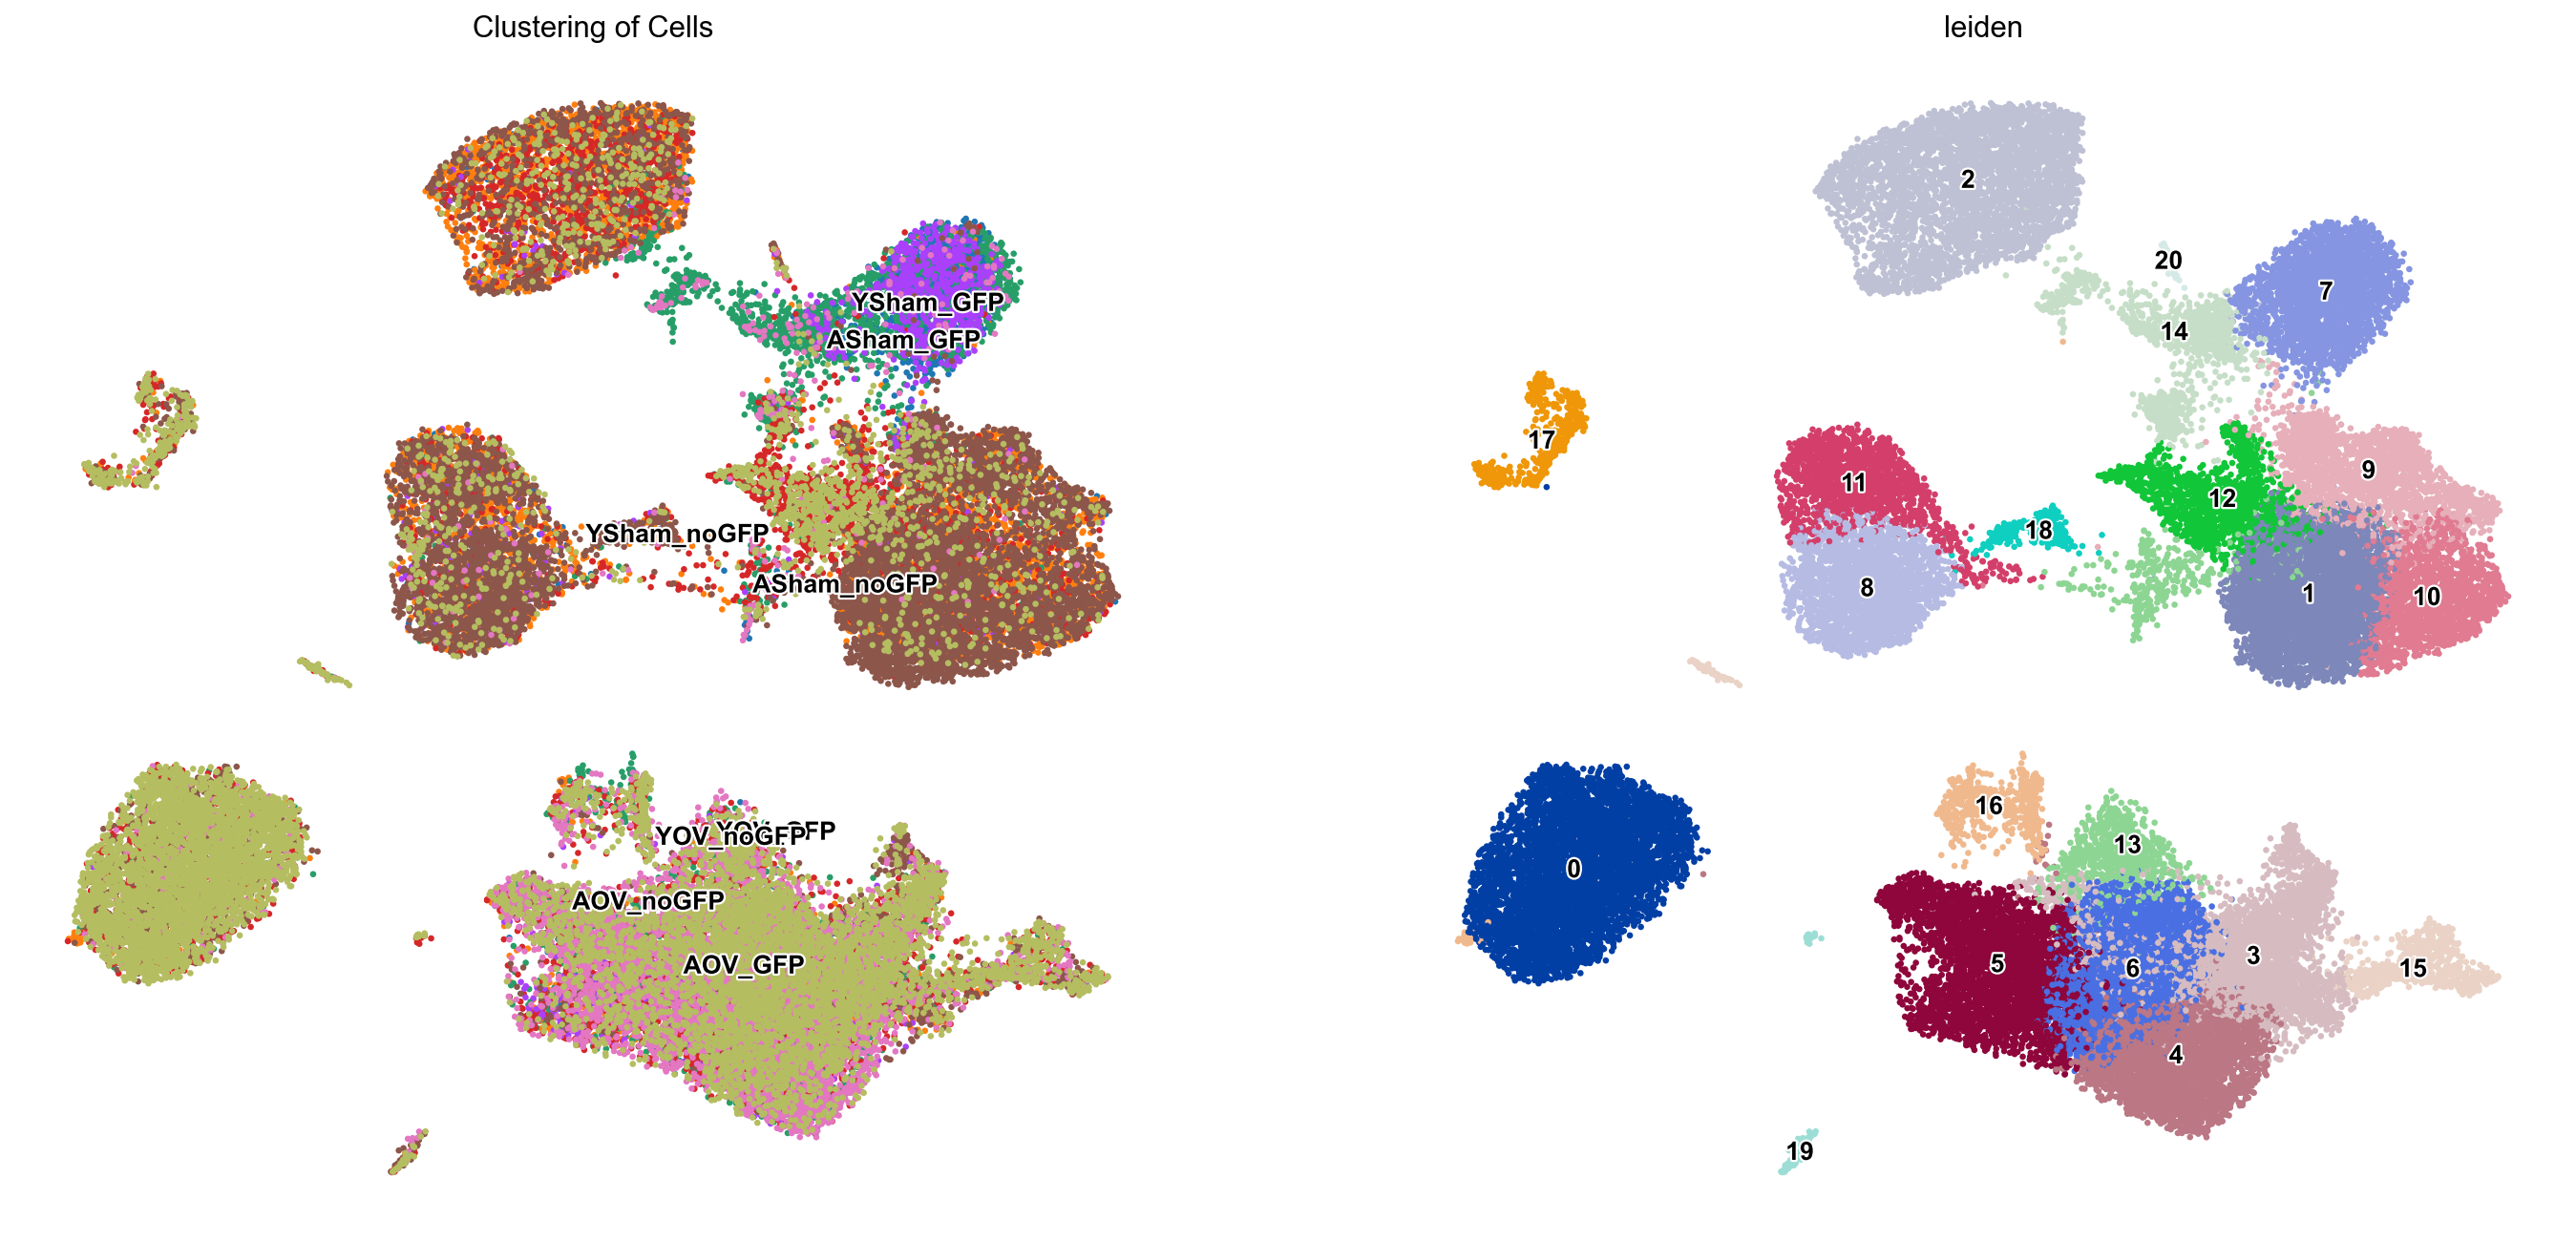

In [19]:
# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample', 'leiden'], legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot after integration sample and cell typeharmony{img_tag}.png')
pl.show()

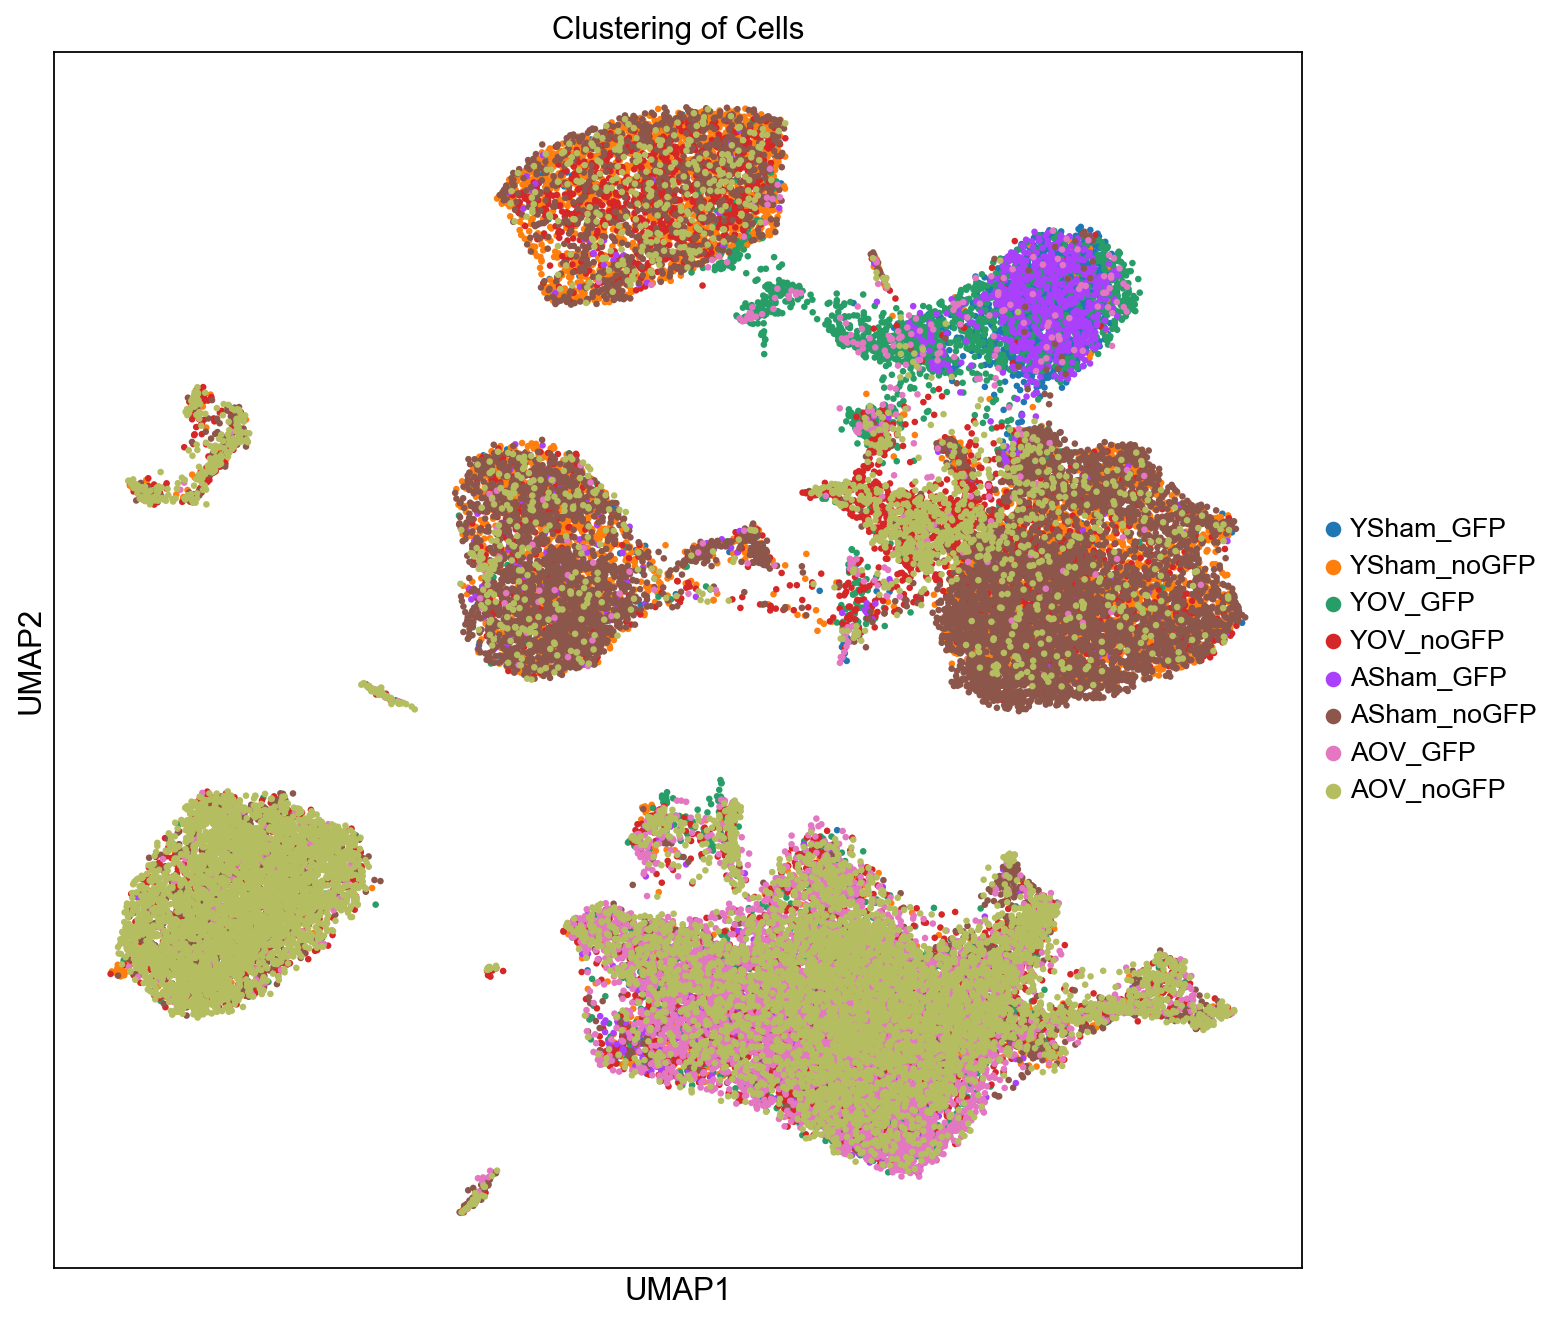

In [12]:

# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=35, title='Clustering of Cells', save=f'umap_plot after intesample1{img_tag}.png')
pl.show()

In [20]:
adata.write('realHarminted_data.h5ad')


In [13]:
adata_concat=adata.copy()

In [30]:

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")
adata = sc.read("realHarminted_data.h5ad")

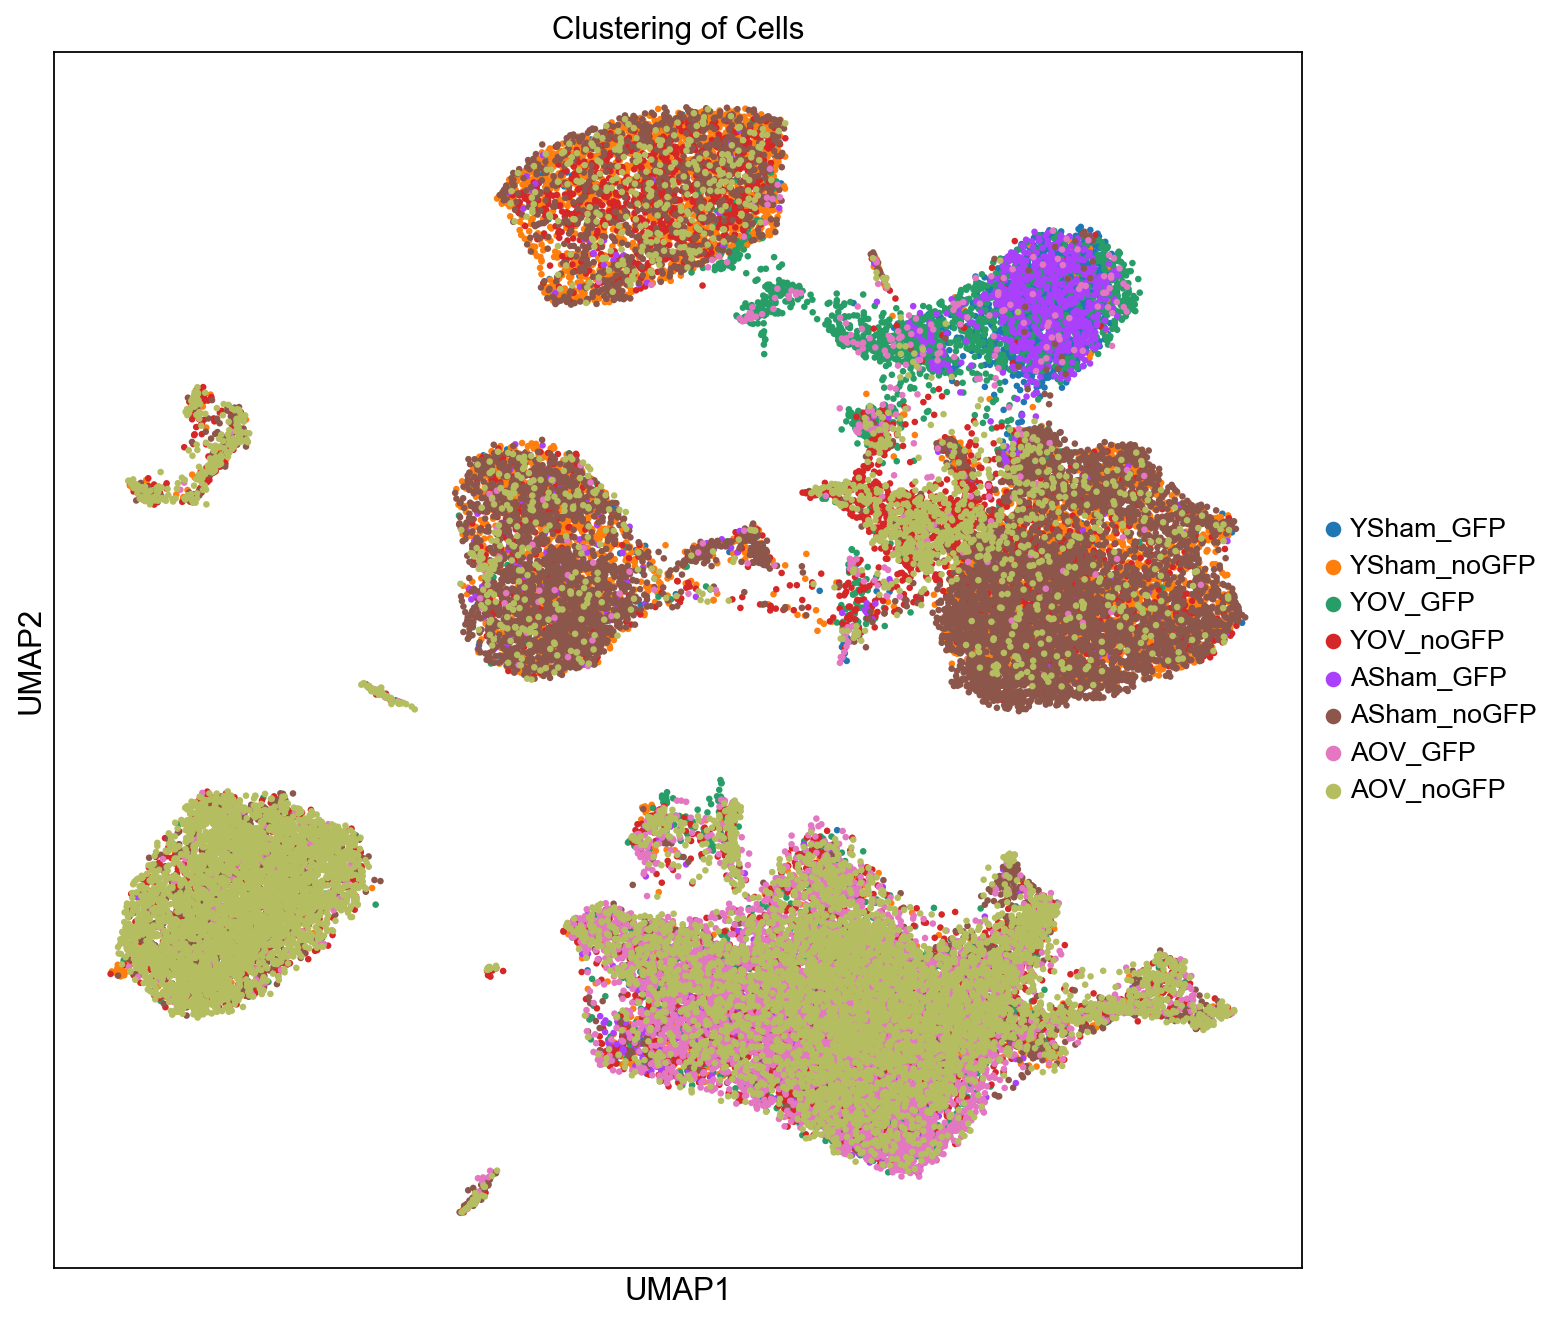

In [31]:

# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=35, title='Clustering of Cells', save=f'umap_plot after intesample1{img_tag}.png')
pl.show()

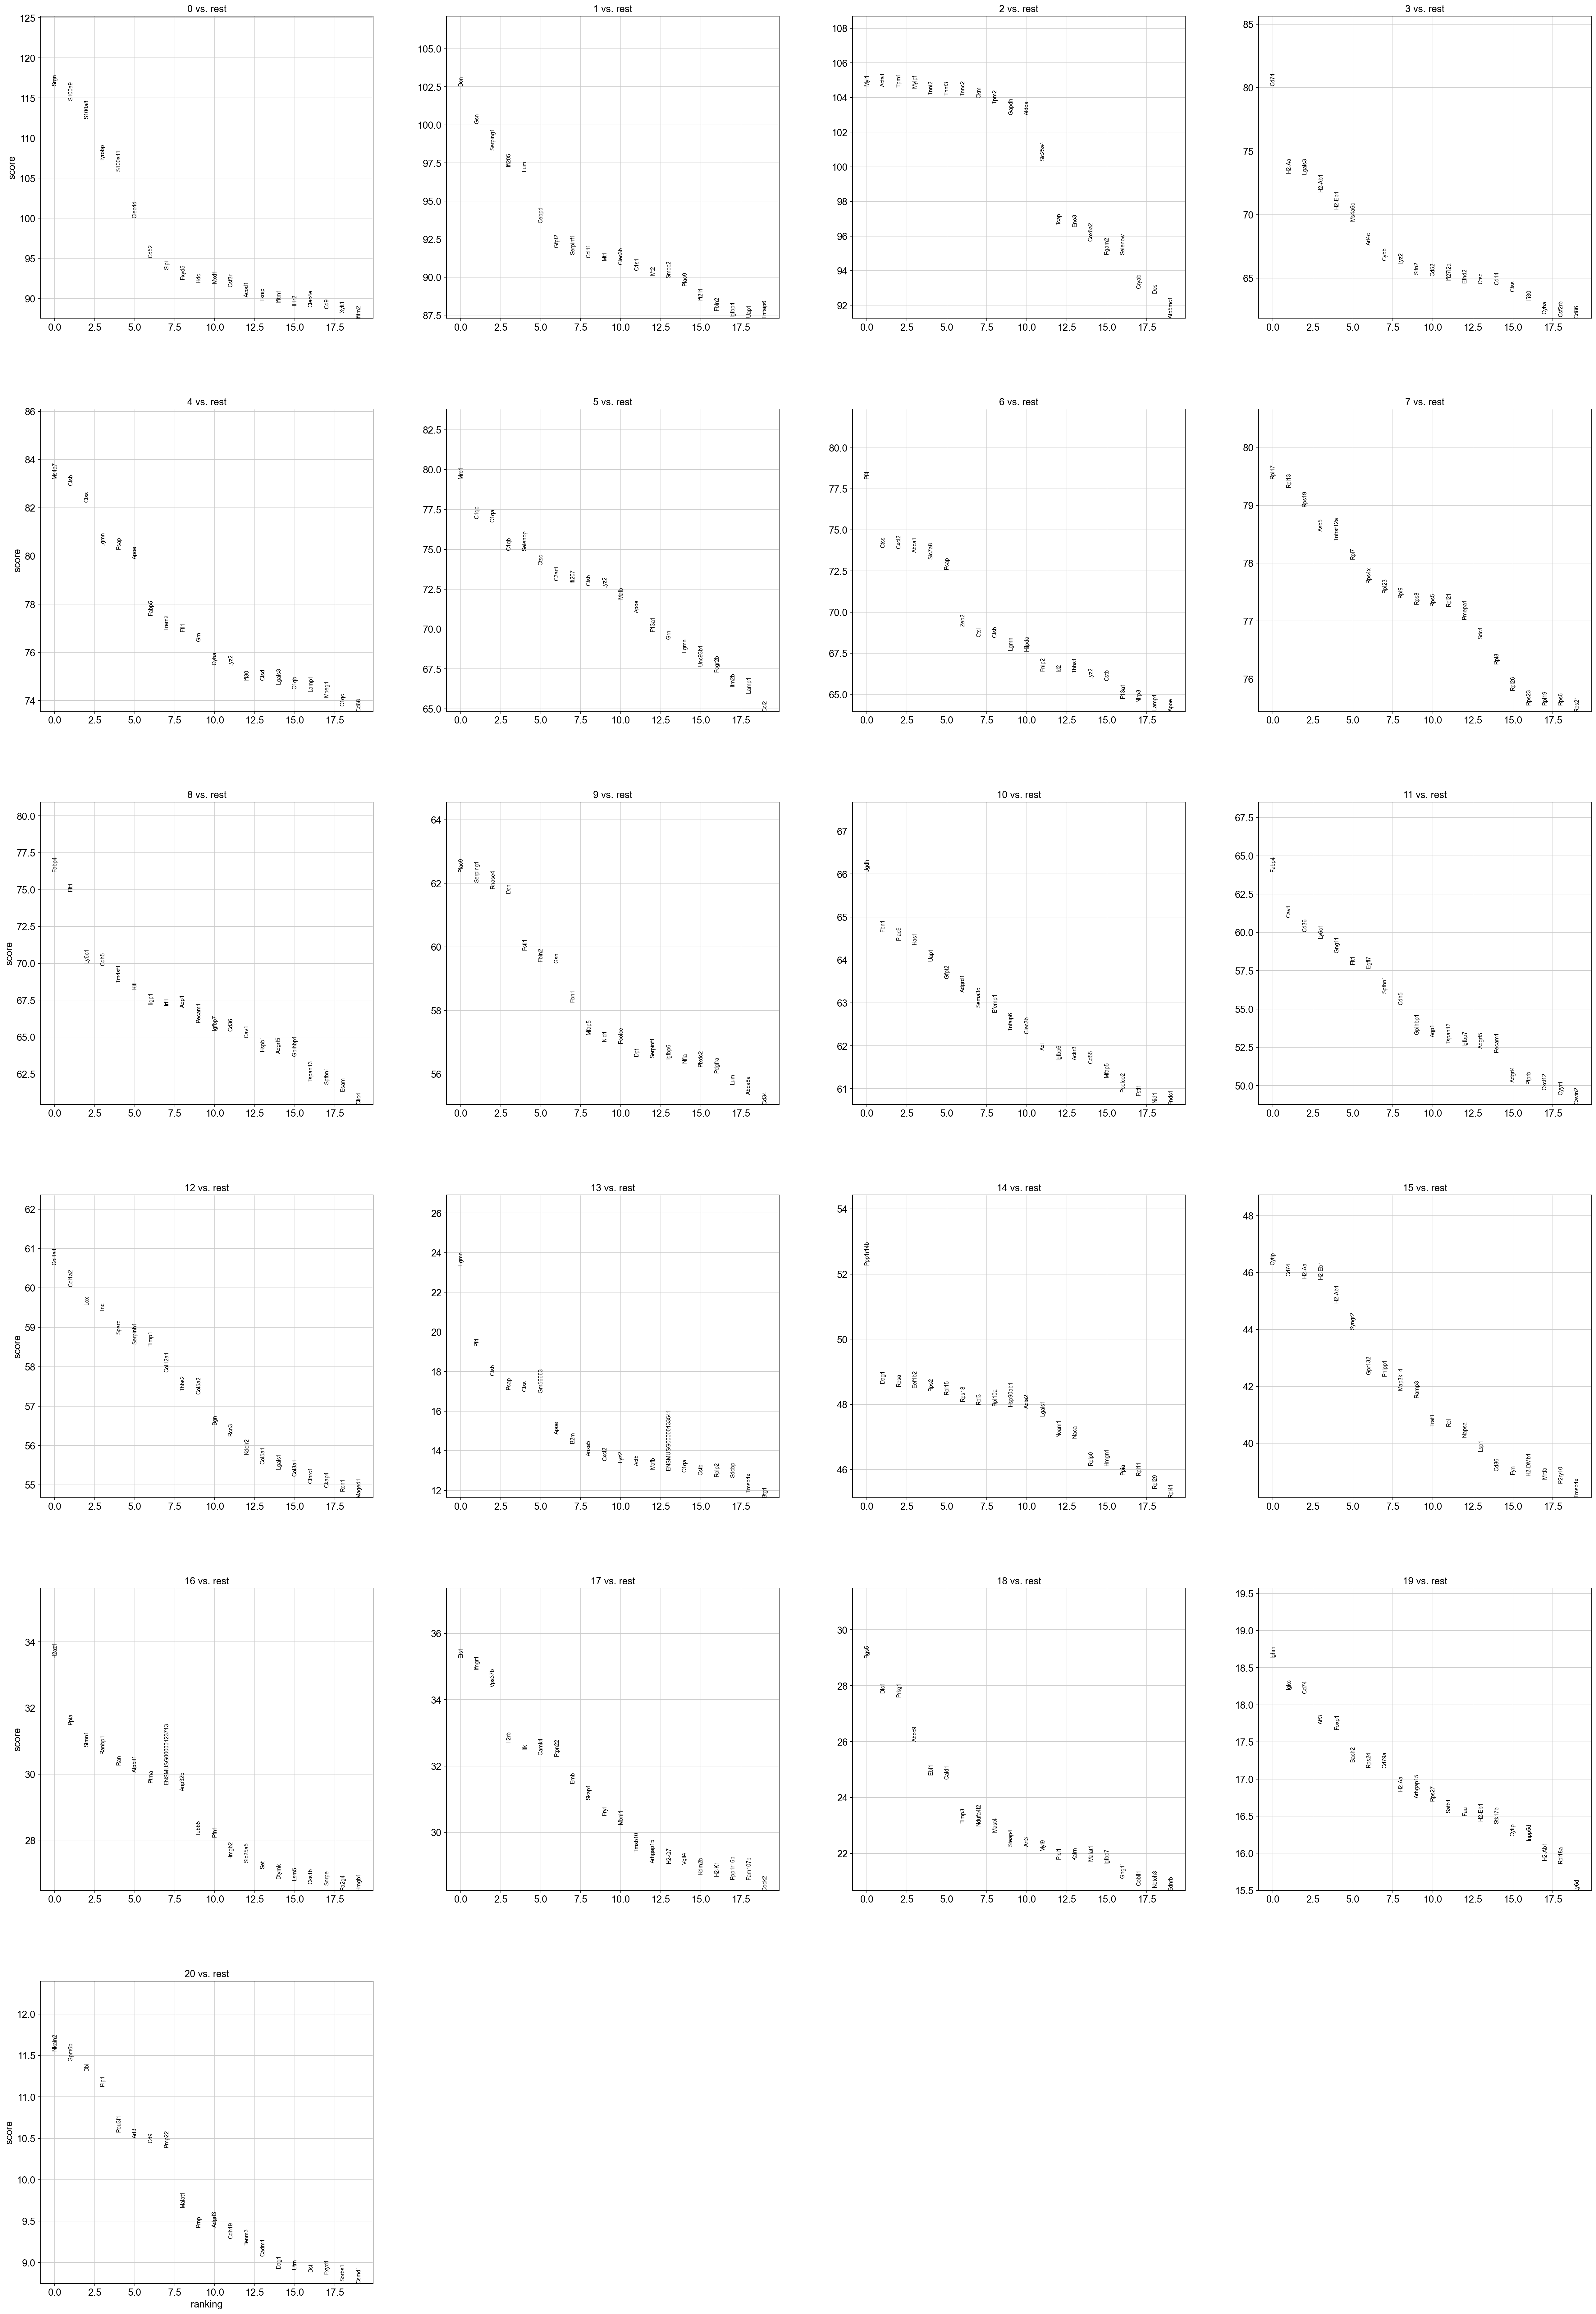

In [32]:
# Find marker genes for the refined clustering
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

# View top marker genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, save=f'rankgenese{img_tag}.png')

In [33]:
result=adata.uns['rank_genes_groups']
groups=result ['names'].dtype.names
df=pd.DataFrame(
    {group + '_' + key[:15]: result [key] [group]
     for group in groups for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [34]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group               names      scores  logfoldchanges     pvals  \
0          0                Srgn  116.526855        4.989949  0.000000   
1          0              S100a9  114.688248       10.738935  0.000000   
2          0              S100a8  112.409073        9.948389  0.000000   
3          0              Tyrobp  107.145355        4.127295  0.000000   
4          0             S100a11  105.877235        3.433529  0.000000   
...      ...                 ...         ...             ...       ...   
758621    20              Dnaaf9    3.318138        1.915717  0.000906   
758622    20              Mamld1    3.315695        3.471808  0.000914   
758623    20  ENSMUSG00000130597    3.309444        2.006406  0.000935   
758624    20              Cdkn2d    3.309181        2.210881  0.000936   
758625    20               Ptprd    3.302026        2.644938  0.000960   

        pvals_adj  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
...           ...  
758621   0.047063  
758622   0.047346  
758623   0.048264  
758624   0.048264  
758625   0.049231  

[58341 rows x 6 columns]

In [35]:
# Create a DataFrame from the 'markers' variable
markers_df = pd.DataFrame(markers)

# Define the full path including the file name and extension
csv_file_path = 'P:/Tolulope/Manuscript/Yuan Analysis/markers_output.csv'

# Save the DataFrame to a CSV file
markers_df.to_csv(csv_file_path, index=False)

print(f"Output saved to {csv_file_path}")

Output saved to P:/Tolulope/Manuscript/Yuan Analysis/markers_output.csv


In [71]:
markers[markers.names =='H2-Aa']  

group  names     scores  logfoldchanges          pvals      pvals_adj
113737     3  H2-Aa  73.269920        5.088930   0.000000e+00   0.000000e+00
152456     4  H2-Aa  27.330866        1.487990  1.823377e-164  7.982435e-163
190157     5  H2-Aa  23.668116        1.457291  7.682928e-124  4.167027e-122
492934    13  H2-Aa   5.281641        0.871237   1.280323e-07   9.094926e-07
568682    15  H2-Aa  45.807331        6.748448   0.000000e+00   0.000000e+00
720336    19  H2-Aa  16.840151        4.939540   1.239216e-63   5.220130e-60

In [72]:
cell_type = {
    "0": "Neutrophils",
    "1": "Fibroadipogenic cells I",
    "2": "Mature skeletal muscle",
    "3": "Residence Macrophages/APC",
    "4": "Lipid-Laden Macrophages",
    "5": "M2-like macrophages",
    "6": "Monocytes/Macrophages",
    "7": "MuSCs",
    "8": "Endothelial cells I",
    "9": "Fibroadipogenic cells II",
    "10": "Fibroadipogenic cells III",
    "11": "Endothelial cells II",
    "12": "Tenocytes",
    "13": "Macrophages",
    "14": "Fusion-Competent Myoblasts",
    "15": "Dendritic cells",
    "16": "Proliferation",
    "17": "T cells/NKCs",
    "18": "Pericytes", 
    "19": "Bcells",
    "20": "Schwann cells",
     
        
}
# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden'].map(cell_type)


In [ ]:
cell_type = {
    "0": "Neutrophils",
    "1": "Lipid-Laden Macrophages",
    "2": "Fibroadipogenic cells I",
    "3": "Mature skeletal muscle",
    "4": "Residence Macrophages/APC",
    "5": "M2-like macrophages",
    "6": "MuSCs",
    "7": "Endothelial cells I",
    "8": "Endothelial cells II",
    "9": "Proliferation",
    "10": "Fibroadipogenic cells I", 
    "11": "Monocytes/Macrophages", "Fusion-Competent Myoblasts"Mymx
    "12": "Dendritic cells",
    "13": "T cells/NKCs",
    "14": "Interferons",
    "15": "Pericytes", 
    "16":  "Bcells",
    "17": "Tenocyte",
    "18": "Schwann cells",
    "19": "Schwann cells",
     Mymx
        
}
# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden'].map(cell_type)


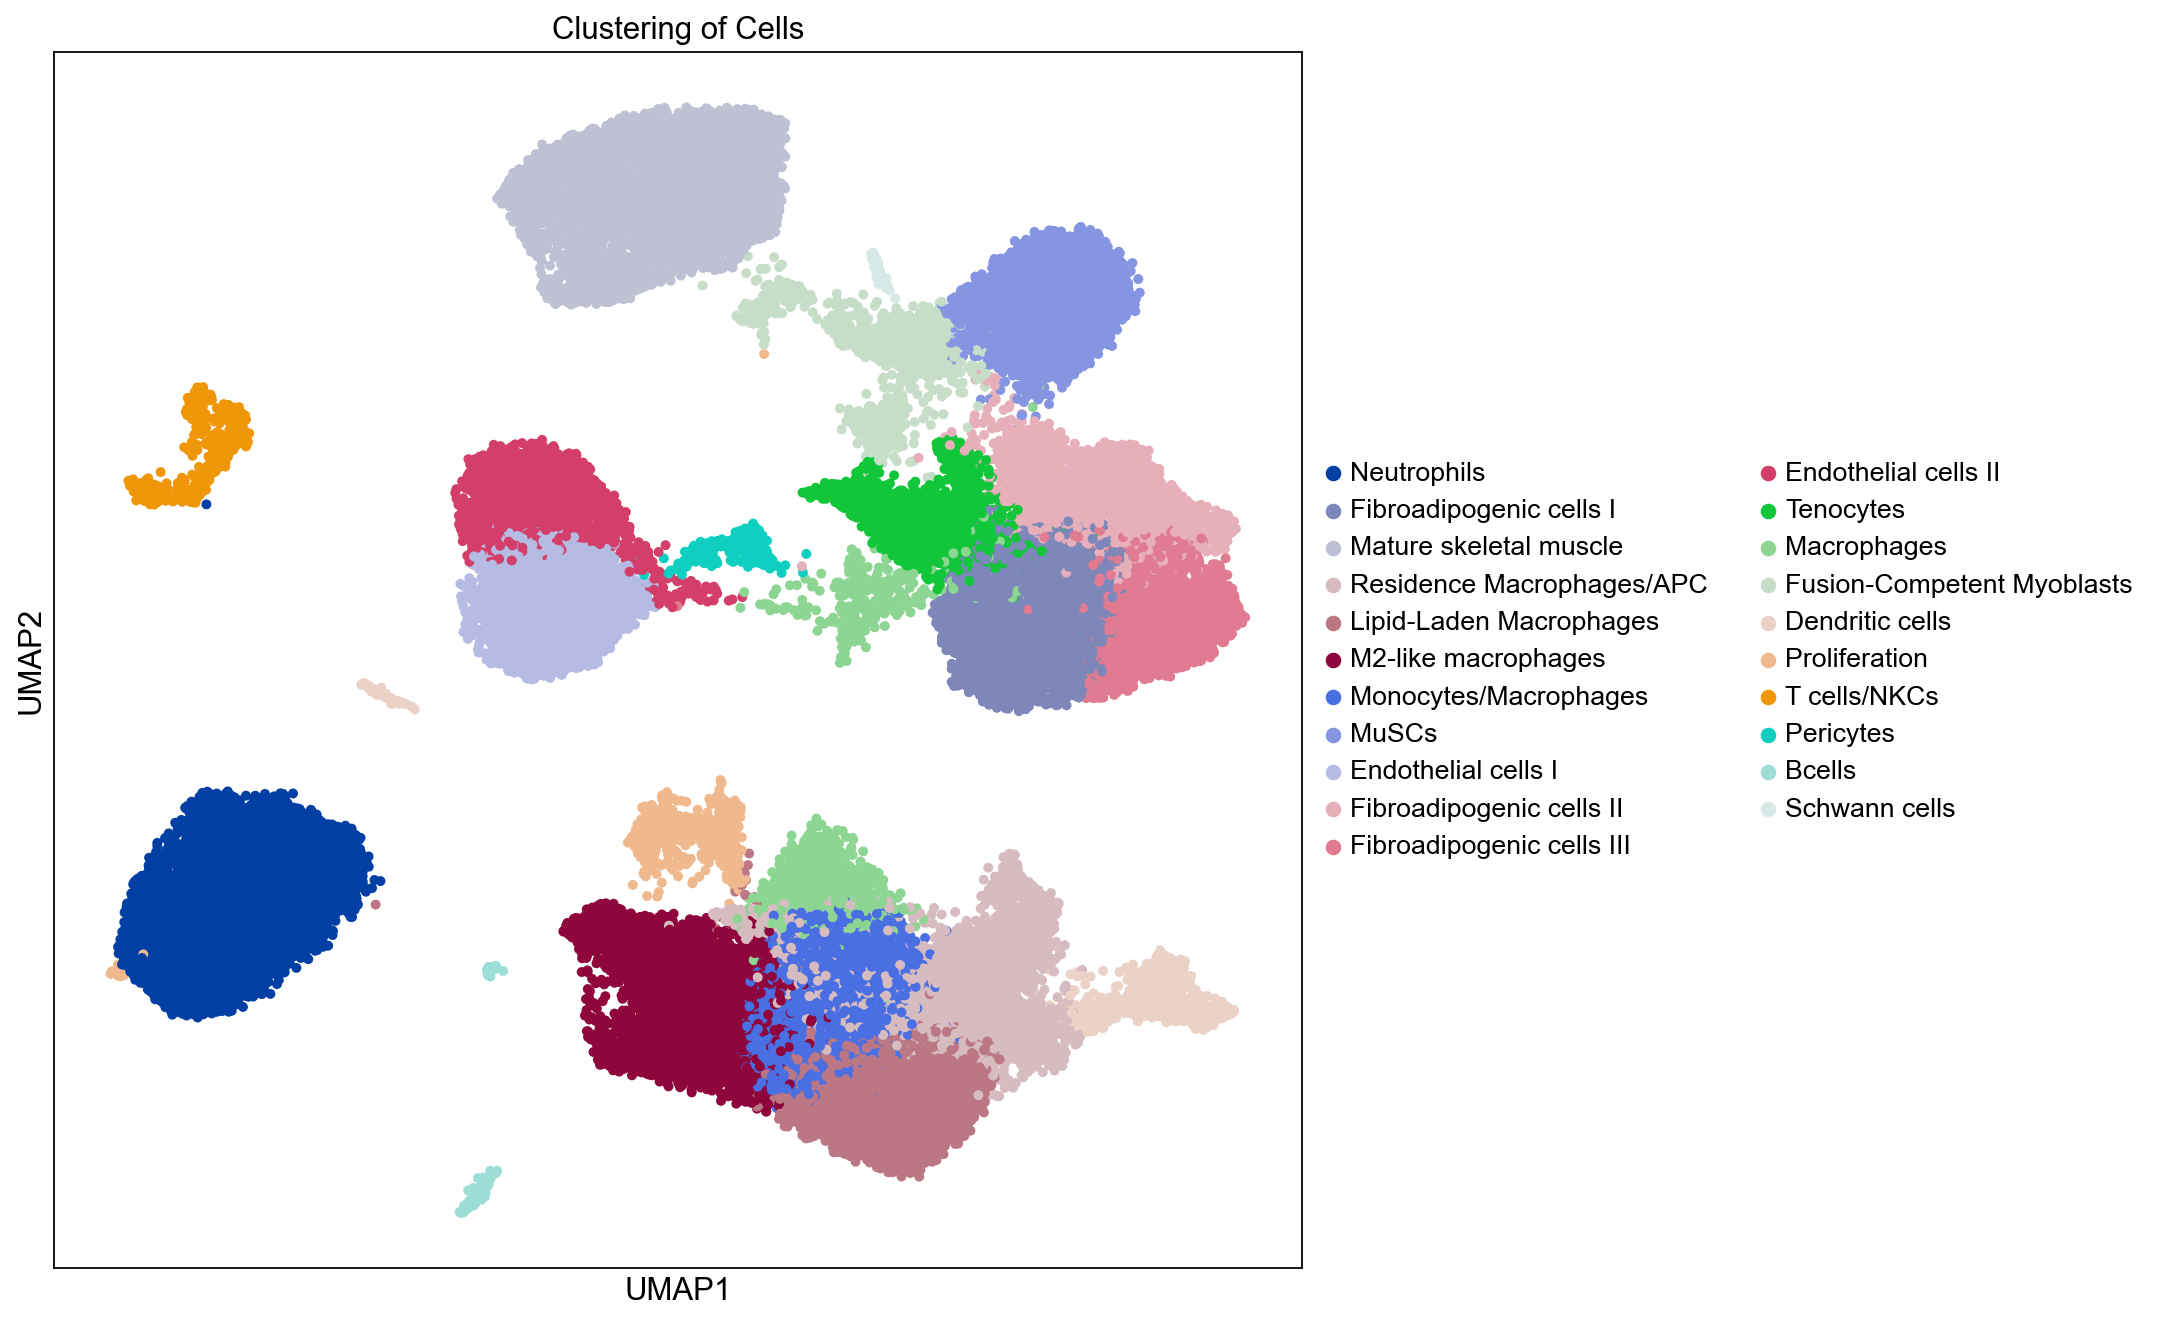

In [73]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [74]:
adata.write_h5ad('integrated celltype originalharmony.h5ad')

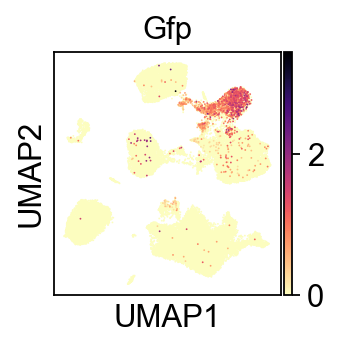

In [14]:
# Set figure size
pl.rcParams['figure.figsize'] = 2, 2

# Create the UMAP plot and save it
sc.pl.umap(adata_concat, color='Gfp', color_map='magma_r', save=f"umap_Gfp_{img_tag}.png")

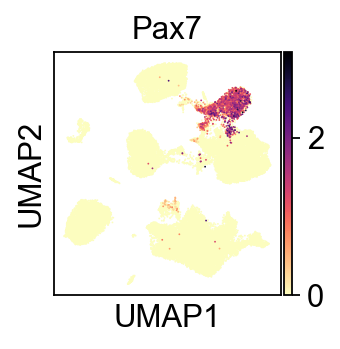

In [15]:
# Set figure size
pl.rcParams['figure.figsize'] = 2, 2

# Create the UMAP plot and save it
sc.pl.umap(adata_concat, color='Pax7', color_map='magma_r', save=f"umap_Pax7_{img_tag}.png")

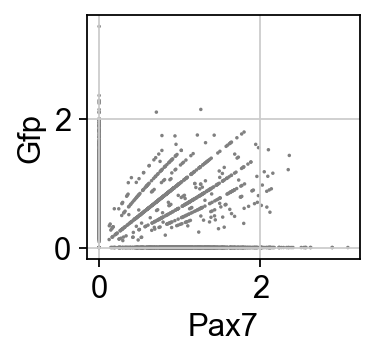

In [16]:
# Set figure size
pl.rcParams['figure.figsize'] = 3, 2

# Scatter plot of Pax7 vs Gfp and save it
sc.pl.scatter(adata_concat, x="Pax7", y="Gfp", size=10, save=f"umap_correlation_{img_tag}.png")


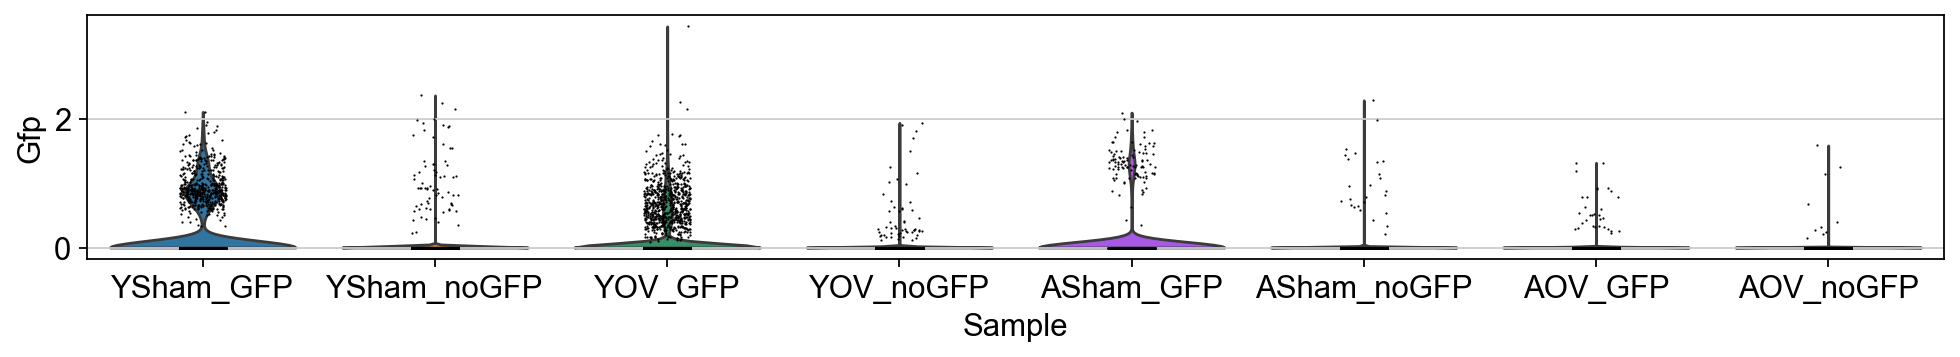

In [17]:
# Set figure size
pl.rcParams['figure.figsize'] = 12, 2

sc.pl.violin(adata, "Gfp", "Sample", save=f"umap_correlation_{img_tag}.png")

In [18]:
# Now, check the raw attribute of the concatenated data
print(adata_concat.raw)  # Print the raw object
print(adata_concat.raw.var.shape)  # Print the shape of raw gene data


Raw AnnData with n_obs × n_vars = 45833 × 37912
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
(37912, 5)


In [19]:
# Filtering cells where 'Gfp' and 'Pax7' have zero expression in raw data
ad_filtered = adata_concat[
    (adata_concat.raw[:, "Gfp"].X.toarray().flatten() == 0) &  # Filter cells where 'Gfp' expression is 0
    (adata_concat.raw[:, "Pax7"].X.toarray().flatten() == 0),  # Filter cells where 'Pax7' expression is 0
    :
].copy()

# Print the filtered object
print(ad_filtered)

AnnData object with n_obs × n_vars = 43257 × 4754
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'Sample_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'


In [20]:
sc.tl.embedding_density(ad_filtered, groupby='Sample')

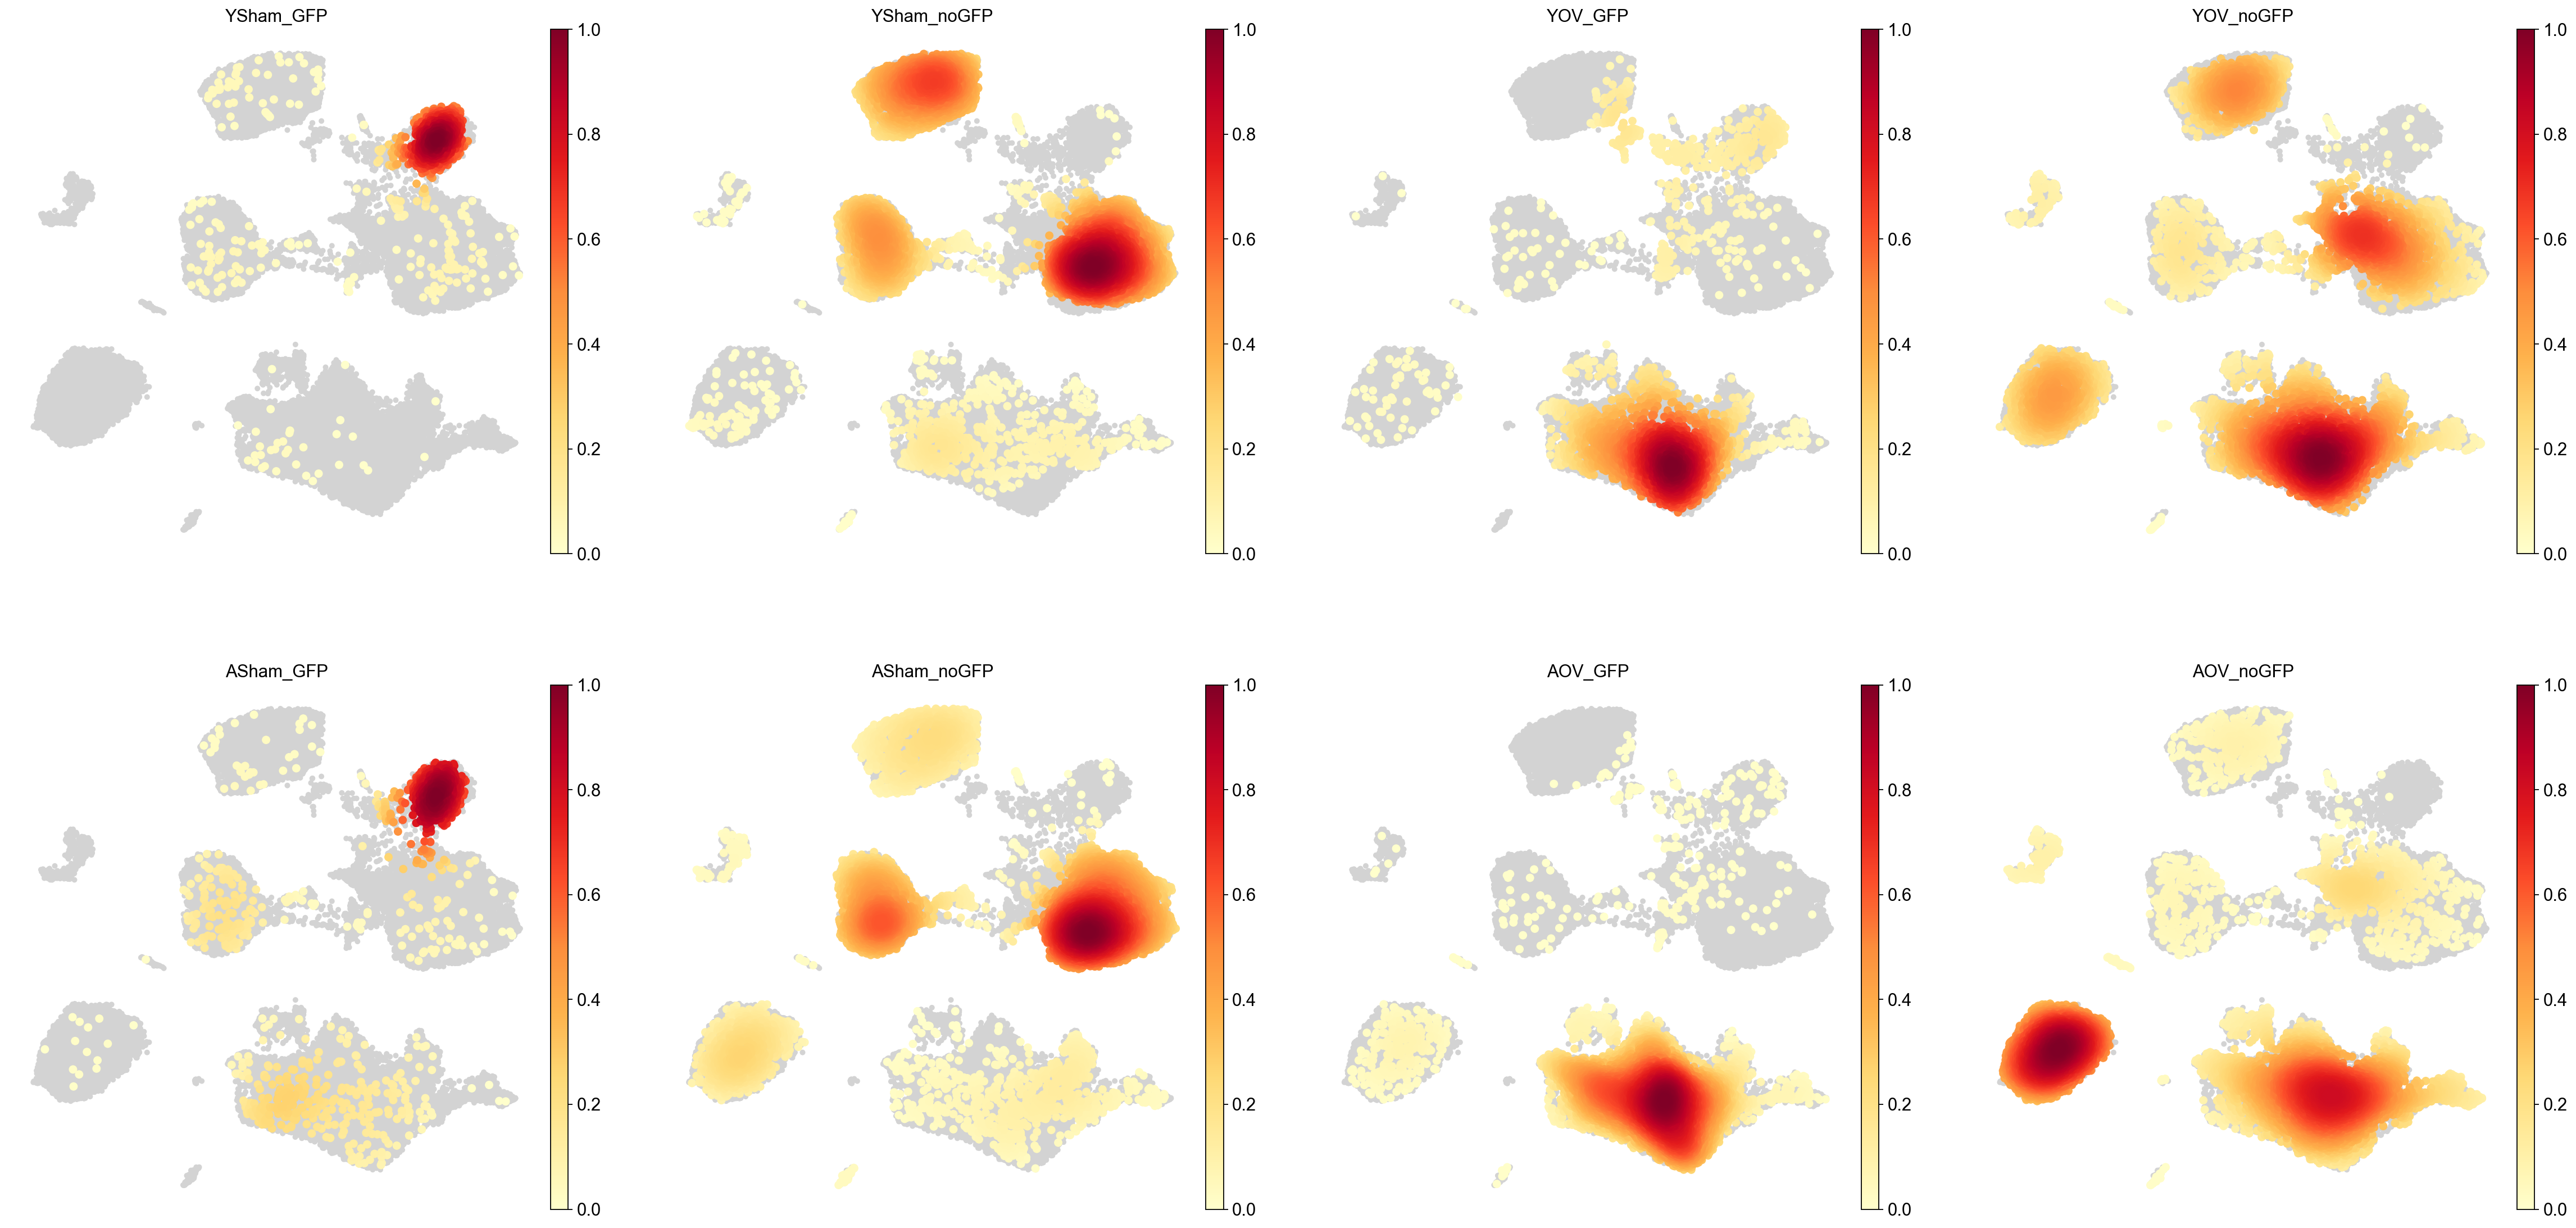

In [21]:
# Set figure size
pl.rcParams['figure.figsize'] = 8, 8
sc.pl.embedding_density(ad_filtered, groupby='Sample',ncols=4,frameon=False, save=f"umap_densityfilted_{img_tag}.png")

In [22]:
ad_filtered.obs[['umap_density_Sample','leiden','Sample']].to_csv('density_by_cluster_filteredrealhamonyUSE.csv')